## Import libraries

First, let's import libraries that we will need.

In [19]:
# Natural Language Tool Kit (NLTK)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Regular Expression for text preprocessing
import re

# Heap (priority) queue algorithm to get the top sentences
import heapq

# NumPy for numerical computing
import numpy as np

# pandas for creating DataFrames
import pandas as pd

# matplotlib for plot
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohamedali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohamedali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load text data

I used the text from a news article entitled **Apple Acquires AI Startup For $50 Million To Advance Its Apps**. 

You can find the original news article here:
https://analyticsindiamag.com/apple-acquires-ai-startup-for-50-million-to-advance-its-apps/

In [20]:
# load text file
with open('mahfoudh article.txt', 'r') as f:
    file_data = f.read()

Let's take a look at the text.

In [21]:
# view text data
print(file_data)

Research Method: Quantitative Research
Enhanced Curriculum Intervention Did
Not Result in Increased Postnatal Physical
Activity in Rural, Southern, Primarily
African American Women
American Journal of Health Promotion
2018, Vol. 32(2) 464-472
ª The Author(s) 2017
Reprints and permission:
sagepub.com/journalsPermissions.nav
DOI: 10.1177/0890117117736090
journals.sagepub.com/home/ahp
Jessica L. Thomson, PhD 1 , Lisa M. Tussing-Humphreys, PhD, RD, LDN 2 ,
Melissa H. Goodman, PhD 1 , and Alicia S. Landry, PhD, RD, LDN, SNS 3
Abstract
Purpose: To test the impact of an enhanced home visiting curriculum on postnatal physical activity in rural, southern, primarily
African American mothers.
Design: Randomized controlled trial.
Setting: Three rural counties in Mississippi.
Participants: Between September 2013 and May 2016, 54 postpartum women randomized to standard home visiting curriculum
(n ¼ 30 control) or lifestyle enhanced home visiting curriculum (n ¼ 24 experimental) were followed for 12 

## Preprocess text

We use regular expression to do text preprocessing. We will:
1. replace reference number with empty space, if any...
2. replace one or more spaces with single space.

In [22]:
text = file_data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace reference number i.e. [1], [10], [20] with empty space, if any..
text = re.sub(r'\s+',' ',text) # replace one or more spaces with single space
print(text)

Research Method: Quantitative Research Enhanced Curriculum Intervention Did Not Result in Increased Postnatal Physical Activity in Rural, Southern, Primarily African American Women American Journal of Health Promotion 2018, Vol. 32(2) 464-472 ª The Author(s) 2017 Reprints and permission: sagepub.com/journalsPermissions.nav DOI: 10.1177/0890117117736090 journals.sagepub.com/home/ahp Jessica L. Thomson, PhD 1 , Lisa M. Tussing-Humphreys, PhD, RD, LDN 2 , Melissa H. Goodman, PhD 1 , and Alicia S. Landry, PhD, RD, LDN, SNS 3 Abstract Purpose: To test the impact of an enhanced home visiting curriculum on postnatal physical activity in rural, southern, primarily African American mothers. Design: Randomized controlled trial. Setting: Three rural counties in Mississippi. Participants: Between September 2013 and May 2016, 54 postpartum women randomized to standard home visiting curriculum (n ¼ 30 control) or lifestyle enhanced home visiting curriculum (n ¼ 24 experimental) were followed for 12 

Next, we form a **clean text** with lower case (without special characters, digits and extra spaces) and split it into individual word, for word score computation and formation of the word histogram. 

The reason to form a clean text is so that the algorithm won't treat, i.e. **"understanding"** and **understanding**, as two different words.

In [23]:
# generate clean text
clean_text = text.lower() # convert all uppercase characters into lowercase characters

# replace characters other than [a-zA-Z0-9], digits & one or more spaces with single space
regex_patterns = [r'\W',r'\d',r'\s+']
for regex in regex_patterns:
    clean_text = re.sub(regex,' ',clean_text)

print(clean_text)

research method quantitative research enhanced curriculum intervention did not result in increased postnatal physical activity in rural southern primarily african american women american journal of health promotion vol ª the author s reprints and permission sagepub com journalspermissions nav doi journals sagepub com home ahp jessica l thomson phd lisa m tussing humphreys phd rd ldn melissa h goodman phd and alicia s landry phd rd ldn sns abstract purpose to test the impact of an enhanced home visiting curriculum on postnatal physical activity in rural southern primarily african american mothers design randomized controlled trial setting three rural counties in mississippi participants between september and may postpartum women randomized to standard home visiting curriculum n ¼ control or lifestyle enhanced home visiting curriculum n ¼ experimental were followed for months intervention the experimental arm of the intervention built upon the parents as teachers curriculum control arm b

## Split text into sentences

We split (tokenize) the text into sentences using NLTK **sent_tokenize()** method. We will evaluate the importance of each of sentences, then decide if we should each include in our summary. 

In [24]:
# split (tokenize) the sentences
sentences = nltk.sent_tokenize(text)
print(sentences)

['Research Method: Quantitative Research Enhanced Curriculum Intervention Did Not Result in Increased Postnatal Physical Activity in Rural, Southern, Primarily African American Women American Journal of Health Promotion 2018, Vol.', '32(2) 464-472 ª The Author(s) 2017 Reprints and permission: sagepub.com/journalsPermissions.nav DOI: 10.1177/0890117117736090 journals.sagepub.com/home/ahp Jessica L. Thomson, PhD 1 , Lisa M. Tussing-Humphreys, PhD, RD, LDN 2 , Melissa H. Goodman, PhD 1 , and Alicia S. Landry, PhD, RD, LDN, SNS 3 Abstract Purpose: To test the impact of an enhanced home visiting curriculum on postnatal physical activity in rural, southern, primarily African American mothers.', 'Design: Randomized controlled trial.', 'Setting: Three rural counties in Mississippi.', 'Participants: Between September 2013 and May 2016, 54 postpartum women randomized to standard home visiting curriculum (n ¼ 30 control) or lifestyle enhanced home visiting curriculum (n ¼ 24 experimental) were fo

## Remove stop words

Stop words are English words which do not add much meaning to a sentence. They can be safely ignored without sacrificing the meaning of the sentence. We already downloaded a file with English stop words in the first section of the notebook. 

Here, we will get the list of stop words and store them in **stop_word** variable.

In [26]:
# get stop words list
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Build word histogram

Let's evaluate the importance of each word based on how many times it appears in the entire text.

We will do so by 1) splitting the words in **clean_text**, 2) removing the stop words, and then 3) checking the frequency of each word as it appears in the text.

In [27]:
# create an empty dictionary to house the word count
word_count = {}

# loop through tokenized words, remove stop words and save word count to dictionary
for word in nltk.word_tokenize(clean_text):
    # remove stop words
    if word not in stop_words:
        # save word count to dictionary
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

Let's plot the word histogram and see the results.

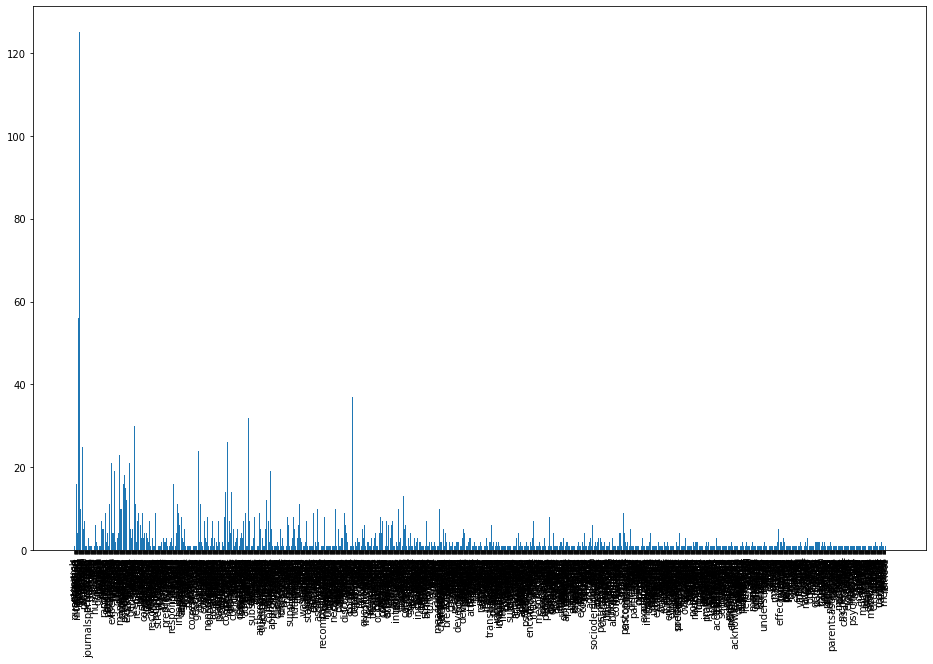

In [28]:
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.bar(word_count.keys(), word_count.values())
plt.show()

Ahhh... it's a bit difficult to read the plot. Let's convert it to horizontal bar plot and display only the top 20 words with a helper function below.

In [29]:
# helper function for plotting the top words.
def plot_top_words(word_count_dict, show_top_n=20):
    """
    Plot top words
    
    INPUT:
    word_count_dict - dict. word count housed in a dictionary
    show_top_n - int. top n words to display (default 20)
    
    OUTPUT:
    Plot with top n words
    
    """
    word_count_table = pd.DataFrame.from_dict(word_count_dict, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    plt.show()

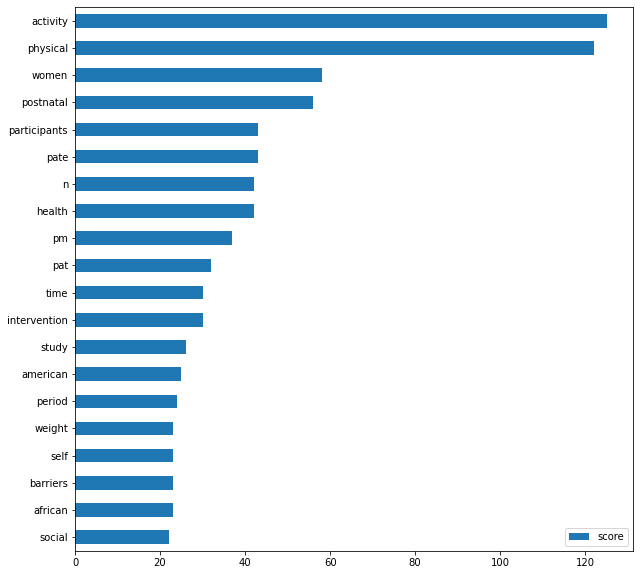

In [30]:
plot_top_words(word_count, 20)

From the plot above, we can see the words **'ai'** and **'apple'** appear on the top. This makes sense because the article is about Apple acquiring an AI startup.

## Rank sentences based on scores

Now, we are going to rank the importance of each sentence based on sentence score. We will:

- remove sentences that have more than **30** words, recognizing that long sentences may not always be meaningful;
- then, add score from each word that forms the sentence to form the sentence score.

Sentence that have high scores will form our top sentences. The top sentences will form our summary later.

In [31]:
# create empty dictionary to house sentence score    
sentence_score = {}

# loop through tokenized sentence, only take sentences that have less than 30 words, then add word score to form sentence score
for sentence in sentences:
    # check if word in sentence is in word_count dictionary
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            # only take sentence that has less than 30 words
            if len(sentence.split(' ')) < 30:
                # add word score to sentence score
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

We convert the **sentence_score** dictionary to a DataFrame and display the sentences and scores.

**Note**: dictionary doesn't allow you to sort the sentences based on scores, so you need to convert the data stored in dictionary to DataFrame.

In [32]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score', ascending = False)

,score
Positive associations between physical activity and self-efficacy for engaging in physical activity have been reported in African American women 5 and women who have recently given birth.,701
"8 Likewise, outcome expectations for physical activity were significantly associated with participation in lifestyle physical activity in African American women.",637
"Research Method: Quantitative Research Enhanced Curriculum Intervention Did Not Result in Increased Postnatal Physical Activity in Rural, Southern, Primarily African American Women American Journal of Health Promotion 2018, Vol.",615
30 Associations between physical activity and psychosocial con- structs of physical activity measured at the PM 1 and 12 visits were computed using Pearson correlation coefficients.,614
Physical activity expectations have been positively correlated with performed physical activity in African Amer- ican women.,609
...,...
Circulation.,1
Bandura A.,1
2nd ed.,1
Am Psy- chol.,1


## Select top sentences for summary

We use heap queue algorithm to select the top 3 sentences and store them in **best_sentences** variable.

**Note:** I chose 3 because our text is a relatively short article.

In [33]:
# get the best 3 sentences for summary             
best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)

Let's display our text summary

In [34]:
print('SUMMARY')
print('------------------------')

# display top sentences based on their sentence sequence in the original text
for sentence in sentences:
    if sentence in best_sentences:
        print (sentence)

SUMMARY
------------------------
Research Method: Quantitative Research Enhanced Curriculum Intervention Did Not Result in Increased Postnatal Physical Activity in Rural, Southern, Primarily African American Women American Journal of Health Promotion 2018, Vol.
Positive associations between physical activity and self-efficacy for engaging in physical activity have been reported in African American women 5 and women who have recently given birth.
8 Likewise, outcome expectations for physical activity were significantly associated with participation in lifestyle physical activity in African American women.


## Insights & Analysis

You have created your personal text summarizer in Python. The summary should look pretty decent.